# Datetime e Séries Temporais

### Os objetos Datetime são um tipo de dado usado para armazenar informações relacionadas à data e ao tempo. As Séries Temporais por sua vez são objetos Series do Pandas que apresentam índices compostos de objetos datetime, isso permite que façamos análises baseadas em intervalos de tempo de forma rápida e eficaz.

### Bibliotecas

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### datetime()
#### Cria objetos datetime.

In [2]:
dt1 = datetime(2004, 5, 23, 17, 55, 33, 234976)
dt1

datetime.datetime(2004, 5, 23, 17, 55, 33, 234976)

In [3]:
# Alguns atributos de datetime.
dt1.year, dt1.month, dt1.day, dt1.hour, dt1.minute, dt1.second, dt1.microsecond

(2004, 5, 23, 17, 55, 33, 234976)

In [4]:
dt2 = datetime(1978, 3, 30)
dt2

datetime.datetime(1978, 3, 30, 0, 0)

In [5]:
dt2.hour, dt2.minute, dt2.second

(0, 0, 0)

In [6]:
# Data e hora atual.
agora = datetime.now()
agora

datetime.datetime(2021, 11, 30, 19, 43, 32, 717005)

In [7]:
# Diferença (delta) de tempo.
delta = datetime.now() - datetime(2000, 7, 12) 
delta

datetime.timedelta(days=7811, seconds=71012, microseconds=729572)

-------------------------------------------------------------------------------------------------------

### datetime.strptime() e strftime()
#### Converte uma string em um objeto datetime e vice-versa, respectivamente. A conversão deve se basear em uma assinatura de símbolos que ditará a ordem dos atributos do objeto datetime.

In [8]:
data = '2020/03/02'

dt3 = datetime.strptime(data, '%Y/%m/%d')
dt3

datetime.datetime(2020, 3, 2, 0, 0)

In [9]:
dt4 = datetime(2015, 9, 27)
dt4

datetime.datetime(2015, 9, 27, 0, 0)

In [10]:
dt4.strftime('%m-%d-%Y')

'09-27-2015'

-------------------------------------------------------------------------------------------------------

### pd.to_datetime(d)
#### Converte d para índices de objetos datetime.

In [11]:
datas = ['1999-01-28 12:55:35', '2003-05-14 15:49:30']

idx1 = pd.to_datetime(datas)
idx1

DatetimeIndex(['1999-01-28 12:55:35', '2003-05-14 15:49:30'], dtype='datetime64[ns]', freq=None)

In [12]:
# Série Temporal.
s1 = pd.Series([1, 2], index=idx1)
s1

1999-01-28 12:55:35    1
2003-05-14 15:49:30    2
dtype: int64

In [13]:
s1.index

DatetimeIndex(['1999-01-28 12:55:35', '2003-05-14 15:49:30'], dtype='datetime64[ns]', freq=None)

In [14]:
# Amostra de tempo.
s1.index[0]

Timestamp('1999-01-28 12:55:35')

-------------------------------------------------------------------------------------------------------

### pd.data_range()
#### Cria um DatetimeIndex baseado em um intervalo de tempo e uma frequência.

In [15]:
idx2 = pd.date_range(start='1/1/2000', periods=366, freq='D')
idx2

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-22', '2000-12-23', '2000-12-24', '2000-12-25',
               '2000-12-26', '2000-12-27', '2000-12-28', '2000-12-29',
               '2000-12-30', '2000-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [16]:
s2 = pd.Series(range(1, 367), index=idx2)
s2

2000-01-01      1
2000-01-02      2
2000-01-03      3
2000-01-04      4
2000-01-05      5
             ... 
2000-12-27    362
2000-12-28    363
2000-12-29    364
2000-12-30    365
2000-12-31    366
Freq: D, Length: 366, dtype: int64

In [17]:
# 51 períodos de Segundas-Feiras.
idx3 = pd.date_range(end='2/20/2020', periods=51, freq='W-MON')
idx3

DatetimeIndex(['2019-03-04', '2019-03-11', '2019-03-18', '2019-03-25',
               '2019-04-01', '2019-04-08', '2019-04-15', '2019-04-22',
               '2019-04-29', '2019-05-06', '2019-05-13', '2019-05-20',
               '2019-05-27', '2019-06-03', '2019-06-10', '2019-06-17',
               '2019-06-24', '2019-07-01', '2019-07-08', '2019-07-15',
               '2019-07-22', '2019-07-29', '2019-08-05', '2019-08-12',
               '2019-08-19', '2019-08-26', '2019-09-02', '2019-09-09',
               '2019-09-16', '2019-09-23', '2019-09-30', '2019-10-07',
               '2019-10-14', '2019-10-21', '2019-10-28', '2019-11-04',
               '2019-11-11', '2019-11-18', '2019-11-25', '2019-12-02',
               '2019-12-09', '2019-12-16', '2019-12-23', '2019-12-30',
               '2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27',
               '2020-02-03', '2020-02-10', '2020-02-17'],
              dtype='datetime64[ns]', freq='W-MON')

In [18]:
# Normalizando a hora de todos os datetime para o horário padrão 00:00:00. Por padrão a frequência é 'D'.
idx4 = pd.date_range(start='01/02/1980 12:30:51', end='14/03/1985 03:45:09', normalize=True)
idx4

DatetimeIndex(['1980-01-02', '1980-01-03', '1980-01-04', '1980-01-05',
               '1980-01-06', '1980-01-07', '1980-01-08', '1980-01-09',
               '1980-01-10', '1980-01-11',
               ...
               '1985-03-05', '1985-03-06', '1985-03-07', '1985-03-08',
               '1985-03-09', '1985-03-10', '1985-03-11', '1985-03-12',
               '1985-03-13', '1985-03-14'],
              dtype='datetime64[ns]', length=1899, freq='D')

-------------------------------------------------------------------------------------------------------

### truncate()
#### Divide uma Series em uma determinada data.

In [19]:
s2.truncate(after='7/1/2000')

2000-01-01      1
2000-01-02      2
2000-01-03      3
2000-01-04      4
2000-01-05      5
             ... 
2000-06-27    179
2000-06-28    180
2000-06-29    181
2000-06-30    182
2000-07-01    183
Freq: D, Length: 183, dtype: int64

In [20]:
s2.truncate(before='12/25/2000')

2000-12-25    360
2000-12-26    361
2000-12-27    362
2000-12-28    363
2000-12-29    364
2000-12-30    365
2000-12-31    366
Freq: D, dtype: int64

-------------------------------------------------------------------------------------------------------

### shift()
#### Atrasa ou adianta um datetime.

In [21]:
s3 = pd.Series(np.random.randn(5), index=pd.date_range('1/1/2019', '2/5/2019', freq='W-MON'))
s3

2019-01-07    1.590919
2019-01-14   -0.077145
2019-01-21    1.545130
2019-01-28    0.922385
2019-02-04    0.815015
Freq: W-MON, dtype: float64

In [22]:
s3.shift(1, freq='H') # Adiantando uma hora.

2019-01-07 01:00:00    1.590919
2019-01-14 01:00:00   -0.077145
2019-01-21 01:00:00    1.545130
2019-01-28 01:00:00    0.922385
2019-02-04 01:00:00    0.815015
dtype: float64

In [23]:
s3.shift(-3, freq='D') # Atrasando 3 dias.

2019-01-04    1.590919
2019-01-11   -0.077145
2019-01-18    1.545130
2019-01-25    0.922385
2019-02-01    0.815015
dtype: float64

-------------------------------------------------------------------------------------------------------

### resample()
#### Faz o agrupamento de Séries Temporais baseado em uma nova frequência.

In [24]:
idx5 = pd.date_range('2000-01-01', periods=100, freq='D')
s4 = pd.Series(np.random.randn(len(idx5)), index=idx5)
s4

2000-01-01    0.104192
2000-01-02   -1.528988
2000-01-03   -0.568943
2000-01-04   -1.252947
2000-01-05    1.492360
                ...   
2000-04-05   -0.646703
2000-04-06   -0.350865
2000-04-07    0.625213
2000-04-08    0.724248
2000-04-09    0.371719
Freq: D, Length: 100, dtype: float64

In [25]:
# Fazendo um downsampling (frequência menor/período maior) ao agregar por mês e calculando a média
# dos grupos.
s4.resample('M').mean()

2000-01-31    0.107266
2000-02-29    0.162049
2000-03-31   -0.314005
2000-04-30   -0.078362
Freq: M, dtype: float64

In [26]:
# Método OHLC (Open-High-Low-Close)
s4.resample('M').ohlc()

,open,high,low,close
2000-01-31,0.104192,1.492360,-1.929837,0.654816
2000-02-29,-0.580498,1.797299,-1.413815,-1.413815
2000-03-31,-0.019107,1.718572,-3.028092,-0.579771
2000-04-30,-0.633571,1.120790,-1.185922,0.371719


In [27]:
idx6 = pd.date_range('2000-01', periods=2, freq='W-SUN')
s5 = pd.Series(np.random.rand(2), index=idx6)
s5

2000-01-02    0.860152
2000-01-09    0.673481
Freq: W-SUN, dtype: float64

In [28]:
# Fazendo um upsampling (frequência maior/período menor) ao agregar por dia. O método asfreq(f) 
# converte uma TimeSeries para a frequência f. Nesse caso, asfreq() está convertendo para a própria
# frequência (W-SUN --> D).
s5.resample('D').asfreq()

2000-01-02    0.860152
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-08         NaN
2000-01-09    0.673481
Freq: D, dtype: float64

In [29]:
# Preenchimento backfill (para trás).
s5.resample('D').bfill()

2000-01-02    0.860152
2000-01-03    0.673481
2000-01-04    0.673481
2000-01-05    0.673481
2000-01-06    0.673481
2000-01-07    0.673481
2000-01-08    0.673481
2000-01-09    0.673481
Freq: D, dtype: float64

In [30]:
# Preenchimento forwardfill (para frente).
s5.resample('D').ffill()

2000-01-02    0.860152
2000-01-03    0.860152
2000-01-04    0.860152
2000-01-05    0.860152
2000-01-06    0.860152
2000-01-07    0.860152
2000-01-08    0.860152
2000-01-09    0.673481
Freq: D, dtype: float64

-------------------------------------------------------------------------------------------------------

### rolling(t)
#### Agrega a instância em intervalos de tempo t, funciona como um agregamento por groupby. A instância agrupada pode ser usada com métodos estatísticos e plotada com a matplotlib.

In [31]:
fecha_spx = pd.read_csv('stock_px_2.csv', parse_dates=True, index_col=0)
fecha_spx = fecha_spx[['AAPL', 'MSFT', 'XOM']]
fecha_spx = fecha_spx.resample('B').ffill()
fecha_spx.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [32]:
fecha_spx.AAPL.rolling(250)

Rolling [window=250,center=False,axis=0]

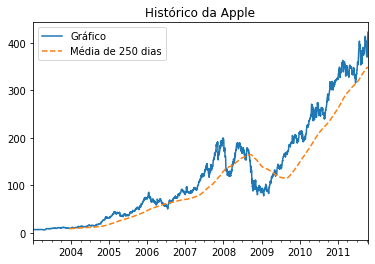

In [33]:
fig1, ex = plt.subplots(1, 1)
fecha_spx.AAPL.plot(ax=ex, label='Gráfico', style='-', title='Histórico da Apple')

# Média móvel de 250 dias.
fecha_spx.AAPL.rolling(250).mean().plot(ax=ex, label='Média de 250 dias', style='--')
ex.legend()

(9913.0, 10436.0)

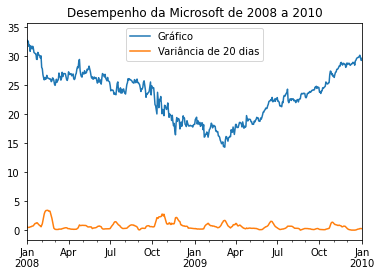

In [34]:
fig2, ex = plt.subplots(1, 1)
fecha_spx.MSFT.plot(ax=ex, label='Gráfico', title='Desempenho da Microsoft de 2008 a 2010')

# Variância dos últimos 20 dias.
fecha_spx.MSFT.rolling(20).var().plot(ax=ex, label='Variância de 20 dias')
ex.legend()
ex.set_xlim([datetime(2008, 1, 1), datetime(2010, 1, 1)])

-------------------------------------------------------------------------------------------------------

### ewm(span=t)
#### Funciona como rolling(), mas os dados são exponencialmente ponderados, isto é, os dados mais recentes tem maior peso nos cálculos pós agregação. O intervalo de tempo é passado para o parâmetro span.

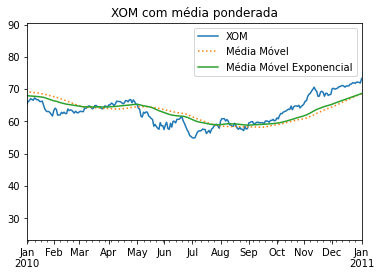

In [35]:
fig3, ex = plt.subplots(1, 1)
fecha_spx.XOM.plot(ax=ex, title="XOM com média ponderada")

# Média móvel de 60 dias.
fecha_spx.XOM.rolling(60).mean().plot(ax=ex, style=':', label='Média Móvel')

# Média móvel exponencial de 60 dias.
fecha_spx.XOM.ewm(span=60).mean().plot(ax=ex, style='-', label='Média Móvel Exponencial')
ex.set_xlim([datetime(2010, 1, 1), datetime(2011, 1, 1)])
ex.legend()

In [36]:
spx = pd.read_csv('stock_px_2.csv', parse_dates=True, index_col=0)
spx = spx['SPX']
spx = spx.resample('B').ffill()
spx_pct = spx.pct_change()
spx_pct.head()

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
Freq: B, Name: SPX, dtype: float64

In [37]:
fecha_spx_pct = fecha_spx.pct_change()
fecha_spx_pct.head()

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145


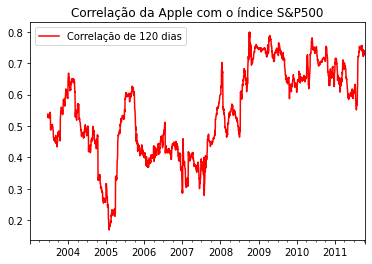

In [38]:
fig4, ex = plt.subplots(1, 1)

# Correlação da Apple com o índice S&P 500 nos último 120 dias.
fecha_spx_pct.AAPL.rolling(120).corr(spx_pct).plot(ax=ex, 
                                              title='Correlação da Apple com o índice S&P500', 
                                              style='r-', 
                                              label='Correlação de 120 dias')
ex.legend(loc='best')